# dataset @ https://finance.yahoo.com/quote/NTAP/history/

In [1]:
import pandas as pd

df = pd.read_csv('NTAP.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1995-11-21,1.078125,1.328125,1.078125,1.281250,0.994211,51412800
1,1995-11-22,1.281250,1.609375,1.265625,1.562500,1.212453,11921600
2,1995-11-24,1.562500,1.703125,1.562500,1.687500,1.309449,2419200
3,1995-11-27,1.781250,1.812500,1.531250,1.578125,1.224577,6720000
4,1995-11-28,1.578125,1.609375,1.562500,1.593750,1.236702,3451200
...,...,...,...,...,...,...,...
6988,2023-08-28,75.250000,76.139999,75.089996,76.010002,76.010002,1376500
6989,2023-08-29,75.900002,76.820000,75.669998,76.419998,76.419998,1354300
6990,2023-08-30,76.279999,76.550003,75.510002,76.430000,76.430000,1784500
6991,2023-08-31,76.809998,76.900002,76.190002,76.699997,76.699997,3068800


In [2]:
df = df[['Date', 'Close']]
df

,Date,Close
0,1995-11-21,1.281250
1,1995-11-22,1.562500
2,1995-11-24,1.687500
3,1995-11-27,1.578125
4,1995-11-28,1.593750
...,...,...
6988,2023-08-28,76.010002
6989,2023-08-29,76.419998
6990,2023-08-30,76.430000
6991,2023-08-31,76.699997


In [3]:
df['Date']

0       1995-11-21
1       1995-11-22
2       1995-11-24
3       1995-11-27
4       1995-11-28
           ...    
6988    2023-08-28
6989    2023-08-29
6990    2023-08-30
6991    2023-08-31
6992    2023-09-01
Name: Date, Length: 6993, dtype: object

In [4]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1995-11-21')
datetime_object


datetime.datetime(1995, 11, 21, 0, 0)

In [5]:
df

,Date,Close
0,1995-11-21,1.281250
1,1995-11-22,1.562500
2,1995-11-24,1.687500
3,1995-11-27,1.578125
4,1995-11-28,1.593750
...,...,...
6988,2023-08-28,76.010002
6989,2023-08-29,76.419998
6990,2023-08-30,76.430000
6991,2023-08-31,76.699997


In [6]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

<ipython-input-6-f6fc52bb0fa5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      1995-11-21
1      1995-11-22
2      1995-11-24
3      1995-11-27
4      1995-11-28
          ...    
6988   2023-08-28
6989   2023-08-29
6990   2023-08-30
6991   2023-08-31
6992   2023-09-01
Name: Date, Length: 6993, dtype: datetime64[ns]

In [7]:
df.index = df.pop('Date')
df

,Close
Date,
1995-11-21,1.281250
1995-11-22,1.562500
1995-11-24,1.687500
1995-11-27,1.578125
1995-11-28,1.593750
...,...
2023-08-28,76.010002
2023-08-29,76.419998
2023-08-30,76.430000


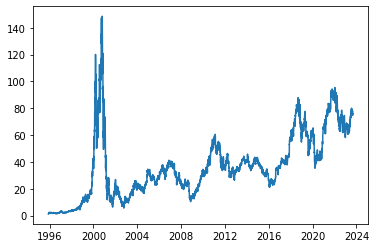

In [8]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])


In [9]:
import numpy as np


def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date +
                              datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(
        day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df


# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df,
                                '2021-11-27',
                                '2023-09-01',
                                n=3)
windowed_df


,Target Date,Target-3,Target-2,Target-1,Target
0,2021-11-27,86.190002,86.760002,89.779999,88.320000
1,2021-11-30,89.779999,88.320000,91.519997,88.879997
2,2021-12-01,88.320000,91.519997,88.879997,89.459999
3,2021-12-02,91.519997,88.879997,89.459999,90.180000
4,2021-12-03,88.879997,89.459999,90.180000,90.050003
...,...,...,...,...,...
438,2023-08-28,76.529999,75.529999,74.720001,76.010002
439,2023-08-29,75.529999,74.720001,76.010002,76.419998
440,2023-08-30,74.720001,76.010002,76.419998,76.430000
441,2023-08-31,76.010002,76.419998,76.430000,76.699997


In [10]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)


dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape


((443,), (443, 3, 1), (443,))

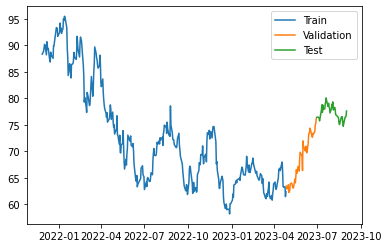

In [11]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)


Epoch 1/100
12/12 [==============================] - 2s 42ms/step - loss: 5353.3794 - mean_absolute_error: 72.5053 - val_loss: 4617.7646 - val_mean_absolute_error: 67.8160
Epoch 2/100
12/12 [==============================] - 0s 6ms/step - loss: 5243.9980 - mean_absolute_error: 71.7454 - val_loss: 4492.6934 - val_mean_absolute_error: 66.8873
Epoch 3/100
12/12 [==============================] - 0s 6ms/step - loss: 5075.2305 - mean_absolute_error: 70.5606 - val_loss: 4276.7559 - val_mean_absolute_error: 65.2524
Epoch 4/100
12/12 [==============================] - 0s 6ms/step - loss: 4793.7212 - mean_absolute_error: 68.5340 - val_loss: 3925.0710 - val_mean_absolute_error: 62.4969
Epoch 5/100
12/12 [==============================] - 0s 5ms/step - loss: 4324.6460 - mean_absolute_error: 64.9833 - val_loss: 3301.9158 - val_mean_absolute_error: 57.2844
Epoch 6/100
12/12 [==============================] - 0s 5ms/step - loss: 3497.9270 - mean_absolute_error: 58.1827 - val_loss: 2308.7041 - val_me

12/12 [==============================] - 0s 2ms/step


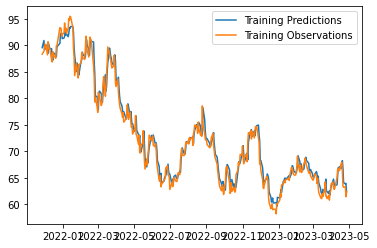

In [13]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])


2/2 [==============================] - 0s 4ms/step


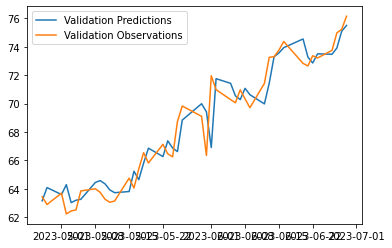

In [14]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])


2/2 [==============================] - 0s 3ms/step


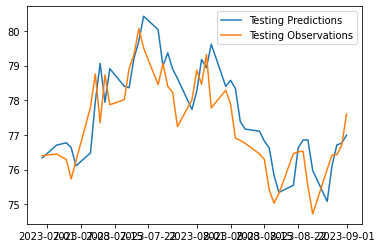

In [15]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])


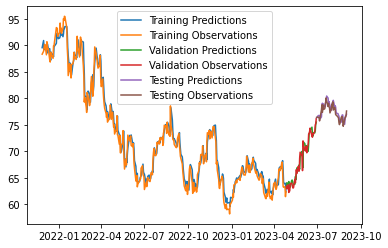

In [16]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])


In [17]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction


1/1 [==============================] - 0s 22ms/step


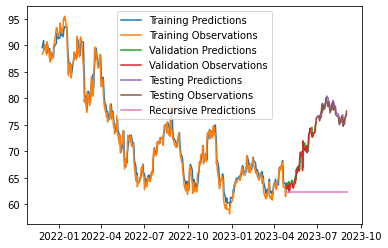

In [18]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])
